***This notebook will follow along with the 2nd chapter of the Hands on ML book by Aurelien Geron. It will also include other materials that are related and comes along the way but the chapter will be the primary resource.***

## Look at the Big Picture and Frame the problem

#### *Machine learning problem - Narrow it down*

A machine learning problem should be narrowed down to as specific as possible. It's definitely not  a bad thing to describe a machine learning problem generally or making it verbally appealing or having an ambitious problem definition is not bad either, at least to make the general people understand the problem better. But you also have to consider that machines don't understand things the same way we do. 

Sometimes we humans understand something intuitively. But for machines the process of learning is nothing but a well defined algorithm (designed to solve specific kinds of problems) and using it to extract patterns and insights from the data. And that's why it's important to have a clear problem definition that can be divided into specific steps or tasks so that the machine understands what it's doing.

*Read [this note](ML_Basics/Theory/04_Machine_Learning_Problem_(Narrow_it_Down).pdf) on how to narrow down a specific problem - brief explanation with example scenario.*

#### *The problem definition framework*

Once you've narrowed down your broad problem to a somewhat specific problem, that you think machine learning can be used to solve, now it's time to dig deep into the problem and define the problem precisely so that you have a clear idea what is your ultimate goal. To do this the problem definition framework can help you.

The problem definition framework goes like this:

1. **Is there a pattern?** - The fundamental assumption that underlies all machine learning problems is that there is a pattern. So before you start, ask yourself, do you think there's a pattern. If not, then we are already done.
2. **Informal description** - Describe the problem as though you were describing it to a friend or colleague. This can provide a great starting point for highlighting areas that you might need to fill. It also provides the basis for a one sentence description you can use to share your understanding of the problem.
3. **Why does this problem needs to be solved?**
    - What's the motivation? What need will be fulfilled when the problem is solved? What is it you're out for?
    - What are the benefits of having this problem solved? What capabilities does it enable?
    - How will the solution be used? What type of lifetime you expect the solution to have?
4. **Make assumptions** - Create a list of assumptions about the problem and it’s phrasing. These may be rules of thumb and domain specific information that you think will get you to a viable solution faster. Make sure to verify these assumptions. Wrong assumptions can have devastating effects on the solution.
5. **Understand the problem from the perspective of the user** - You have to have a clear view of your goal. And what better way to know what problem(s) to solve than asking the users themselves what they want. No one knows the problem better than the intended user - the person we are attempting to solve the problem for. This will help you massively to *pinpoint the features that your dataset should be comprised of.*
6. **Subject yourself to the problem** - Explore how you would solve the problem manually. List out step-by-step what data you would collect, how you would prepare it and how you would design a program to solve the problem. 

*Read [this note](ML_Basics/Theory/05_So_How_do_You_Define_a_Machine_Learning_Problem.pdf) on how to define a machine learning problem for a bit more explanation with example scenarios.*

#### *Evaluation of success*

Answer the following 3 questions:

1. **What does success look like?** - What it would look like if your machine learning model answered your questions perfectly. How would you use that information? Would you trust it? Should we, trust it?
2. **How are we already measuring success?** - It is possible to define a new metric to evaluate a process or model's performance. But it's not ideal. A better situation would be, if we had some kind of system already in place to measure against. The aim of using a machine learning model to solve a problem is to increase the efficiency. So it's natural that we would like to know how our model is performing in comparison to the solution already in place (the benchmark).
3. **How are you currently measuring success?/How do you want to measure success?** - ***If you haven't already, select a performance measure.*** Now ask yourself this, Does it measure what you want it to measure? How sure are you that your measurement actually evaluates something you care about. Is there another better way of evaluating that gets you closer to your ultimate goal? Is your choice of proxies optimal?

*Read [this note](ML_Basics/Theory/05_So_How_do_You_Define_a_Machine_Learning_Problem.pdf). It explains the above 3 points a bit more in depth and if you don't know what proxies are you should definitely check it out.*

#### *Verify the Assumptions*

List and verify the assumptions that have been made so far (by you or others); this can help you catch serious issues early on.

#### *Start designing your system*

With all this information, you are now ready to start designing your system. First, determine what kind of training supervision the model will need: is it a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? And is it a classification task, a regression task, or something else? Should you use batch learning or online learning techniques? 

## The task at hand

Welcome to the Machine Learning Housing Corporation! Your first task is to use California census data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them “districts” for short. 

Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

**Going through the above-mentioned process of framing the problem,** 

- *We've learned the following:*
    1. Our model’s output (a prediction of a district’s median housing price) will be fed to another machine learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given area. Getting this right is critical, as it directly affects revenue.
    2. The district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules. When they can gather the median housing price, often their estimation is off by a large margin, somewhere around 30%.


- *We've made the following assumptions:*
    1. The output of our model is a continuous variable i.e, the predicted median price in USD.
    2. Our model will be trained only on the available census dataset and won't be having incoming data points.


- *We've verified our assumptions and decided on the following:*
    1. Our model will be a supervised regression model. It will be a *batch learning aka. offline learning* model.
    2. As our performance measure we will be using *Root mean squared error (RMSE)*.


## Getting the data

In typical environments your data would be available in a relational database or some other common data store, and spread across multiple tables/documents/files. To access it, you would first need to get your credentials and access authorizations and familiarize yourself with the data schema. 

In this project, however, things are much simpler: we will just download a single compressed file, housing.tgz, which contains a comma-separated values (CSV) file called housing.csv with all the data.


Rather than manually downloading and decompressing the data, it’s usually preferable to write a function that does it for you. This is useful in particular if the data changes regularly: you can write a small script that uses the function to fetch the latest data (or you can set up a scheduled job to do that automatically at regular
intervals). Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

> To work with paths and directories in Python we can use multiple libraries such as, the os module, pathlib module, glob module etc. We will use the `pathlib` library due to some of its advantages such as, robustness, ease of use, consistency etc. To use the pathlib library, you can import the pathlib module and then create a `Path` object for the path you want to work with. Once you have a Path object, you can use its methods and operators to perform various operations on the path.
>
>> See a quick overview of the pathlib module and its usage [here](https://g.co/bard/share/1b0eda92c474).

In [99]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [100]:
def load_housing_data():
    cwd = Path()
    housing_dataset_path = Path("datasets/housing/housing.csv")
    # if the dataset file doesn't exist then download it
    if not housing_dataset_path.is_file():
        # parents = True : if parent directories doesn't exist create them
        # exist_ok = True : if the directory already exists then don't raise error
        Path("datasets").mkdir(parents=True, exist_ok=True)  # returns None
        datasets_dir_path = Path("datasets")
        tarball_path = datasets_dir_path / "housing.tgz"
        dataset_url = "https://github.com/ageron/data/raw/main/housing.tgz"
        # urllib will be used to download the tarball which is saved as "datasets/housing.tgz"
        urllib.request.urlretrieve(dataset_url, tarball_path)
        # tarfile module is used to extract the contents of the tarball to the datasets_path
        # the file will be extracted as, "datasets/housing/housing.csv"
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path=datasets_dir_path)
    return pd.read_csv(housing_dataset_path)

In [101]:
housing_df = load_housing_data()

## Initial exploration

- Get a quick look at the data with `df.head()`

In [102]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- No. of rows and columns

In [103]:
n_obs, n_cols = housing_df.shape
print(f"number of observations: {n_obs}")
print(f"number of columns: {n_cols}")

number of observations: 20640
number of columns: 10


- Get a quick description of the data (total rows, total columns, non-null values in each column, datatypes etc.)

In [104]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- Percentage of missing data

In [105]:
housing_df.isna().mean().mul(100)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

*About 1% of the "total_bedrooms" data is missing. We can either drop those rows, impute them (filling the nan values with mean/median/mode/other strategy) or, drop the column altogether. We will decide what to do after some more exploration.*

- Only the "ocean_proximity" column is object type, all the other columns are number types. We can explore some basic insights on the number type columns with the `df.describe()` method. For exploring the object type columns, `ser.value_counts()` is a good start.

In [106]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


*Looking at the "min" and "max" values of the "median_income" column we can see that they are definitely not in USD. Contacting the client reveals that, this column have been scaled down by a factor of 10,000 i.e, 3 is actually meant to represent 30,000 USD. A histogram would be a good choice to see if there are any more caveats, for example if the data is clipped or not.*

In [107]:
housing_df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

- Get a feel about how the numerical variables are distributed

In [108]:
import matplotlib.pyplot as plt

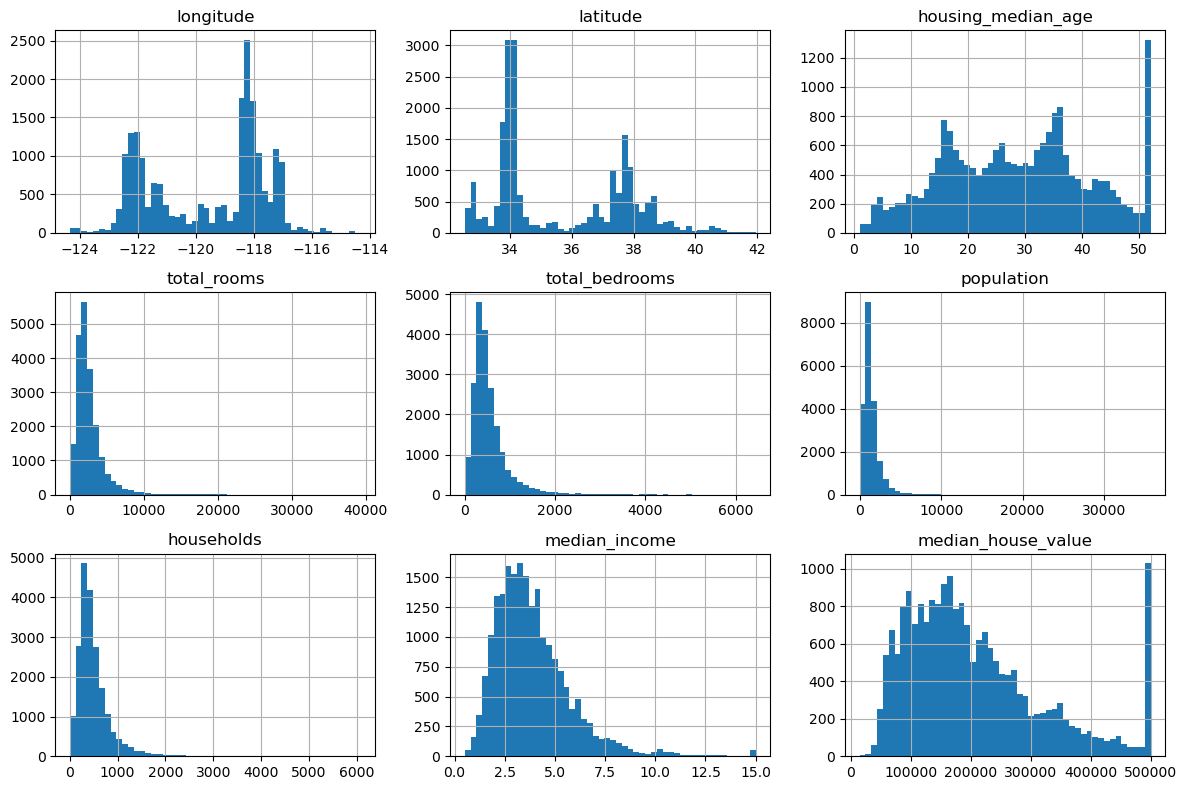

In [109]:
housing_df.hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

*Looking at the histograms we can see that:*
<i>

1. The "housing_median_age" is capped at 52 years. Also there's a lot of districts for which the median value is capped, evident from the count shown along the y axis.
2. The "median_income" column has been scaled down by a factor of 10,000 USD (as noted earlier). Also, the column data seems to be capped at about 0.5 for median income lower than 5,000 USD and at about 15 for median income above 150,000 USD.
3. The "median_house_value" seems to have been capped at 500,000 USD. Since this is the target variable we need to think extra carefully about what to do. Consult with the client to know what they think. If they need exact predictions for values beyond 500,000 USD, we could either drop the rows with median_house_value == 500_000 but there's about 1000 such rows (that's about 5% of the data) or we can try to collect the exact values if possible. 
4. A common pattern among all the variables is that they have very different scales. Also most of the distributions are right skewed.
</i>

## Create a test set

It may seem too early to create a test set. It's very tempting to first dig through all the data and see if we can find any potential relation among the variables or if there are any patterns at all. But doing this can lead to overfitting of the model on the training and test set instead of generalizing on unseen data points. 

To avoid this we separate out a test set now. Also if the dataset is very large and hard to work with we can also sample out an *exploration set* for further inspection.

There are a lot of ways in which we can sample our test set from the whole dataset such as, simple random sampling, stratified random sampling, convenience sampling etc. 

To know more about sampling methods refer to - [Sampling (theory)](../Statistics/Theory/07_Sampling.md) and [Sampling in Python (notebook)](../Statistics/Sampling_and_Hypothesis_Testing/01_Sampling.ipynb).

- If the dataset is large enough, and there are no subgroups in any of the variables that needs to be proportionately represented, we can use *simple random sampling*. 

    1. We can use the `np.random.default_rng(seed).permutation(len(df)*test_set_ratio)` to generate a list of random indices which can then be used with `df.iloc[idx]` or, `df.iloc[~idx]` to generate the training and test set. 
    2. We can also use the `df.sample(frac, random_state)` function to generate a test set and then use `df.iloc[~test_set.index]` to create the training set.
    3. We can also use the `sklearn.model_selection.train_test_split(df, test_size, random_state)` function which will do this (i.e, generate the training and test set) in only one single line.

In [110]:
from sklearn.model_selection import  train_test_split

In [111]:
train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=42)

- If the dataset is not large enough and you are concerned about **sampling bias** or, there are subgroups in a variable which needs to be proportionately represented in the test set, we can use *stratified random sampling.*

    1. We first need to identify the subgroups. For categorical data it is easy to identify these subgroups. For numerical data we would need to create a new categorical column. The `pd.cut()` method is a very useful method for creating categorical representatives of a numeric column.
    2. Again, we can go through the long route by using `.groupby().sample()` or we can just use `sklearn.model_selection.train_test_split(df, test_size, random_state, stratify=df.cat_col)` to create a single stratified random train and test set.

*Let's say we've been told that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole
dataset.*

The problem is that, the "median_income" column is a numeric column and there are no categorical column that represents different categories for median income. So we would have to create the categorical representations ourselves.

`Note:` It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. 

Let's look closely at the distribution of the *"median_income"* column.

In [112]:
import numpy as np

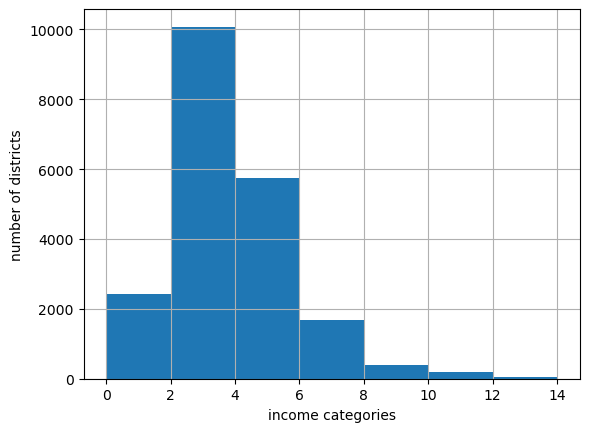

In [113]:
ax = housing_df.median_income.hist(bins=np.arange(0, 15, 2))
ax.set(xlabel="income categories", ylabel="number of districts")
plt.show()

Playing around with the *"bins"* argument we think we should create 4 categories - {1: 0-2, 2: 2-4, 3: 4-6, 4:6+}. We use ordinal numbers as categories since the bins are actually ordinal in nature.

In [114]:
housing_df["median_income_cat"] = pd.cut(housing_df["median_income"], bins=[0, 2, 4, 6, np.inf], labels=[1, 2, 3, 4])

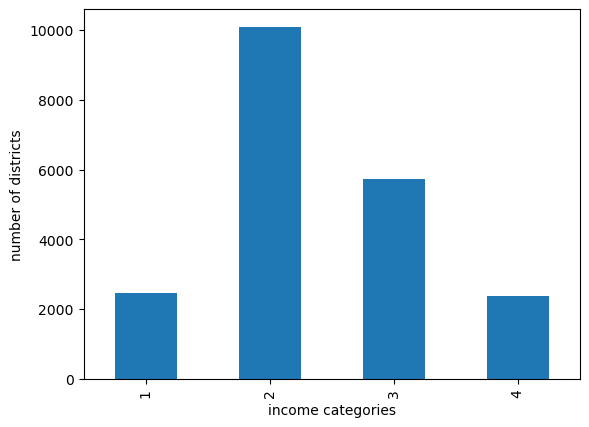

In [119]:
# since these are discrete data we use a bar plot to visualize them
ax = housing_df.median_income_cat.value_counts().sort_index().plot.bar()
ax.set(xlabel="income categories", ylabel="number of districts")
plt.show()

In [91]:
strat_train_set, strat_test_set = train_test_split(housing_df, test_size=0.2, random_state=42, stratify=housing_df.median_income_cat)

We can verify that the categories of the *"median_income_cat"* column are equally represented in both the train and test set similar to how the categories are represented in the whole dataset.

In [129]:
strat_rep = pd.DataFrame(housing_df.median_income_cat.value_counts(normalize=True)).sort_index().rename(columns={"proportion":"whole_dataset_rep"})
strat_rep = strat_rep.assign(train_set_rep = strat_train_set.median_income_cat.value_counts(normalize=True).sort_index(), test_set_rep = strat_test_set.median_income_cat.value_counts(normalize=True).sort_index())

strat_rep

,whole_dataset_rep,train_set_rep,test_set_rep
median_income_cat,,,
1,0.119041,0.119004,0.119186
2,0.489147,0.489159,0.489099
3,0.277374,0.277374,0.277374
4,0.114438,0.114462,0.114341


In [96]:
# we won't be needing the "median_income_cat" column anymore so we can just drop it
housing_df = housing_df.drop(columns="median_income_cat")